## 데이터 분석

In [1]:
# 라이브러리
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 차원 축소
from sklearn.decomposition import PCA

# 군집화
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN

# 군집 평가
from sklearn.metrics import silhouette_score

# 경고 무시
import warnings
warnings.filterwarnings('ignore')


In [2]:
# 데이터 읽어오기
df = pd.read_csv('C:/woogi/KWU/3-2/Machine_Learning/Term_Project#3/CC.csv')
df

# 마케팅 전략을 정의하기 위한 고객 세분화
# 최근 6개월 동안 약 9000명의 활성화된 신용카드 보유자들의 이용 행태를 정리한 데이터셋

# 18개의 행태 변수
# CUST_ID : 신용카드 보유자 고객 번호
# BALANCE : 본인 계좌에 남아있는 잔금
# BALANCE_FREQUENCY : 잔금을 업데이트하는 빈도, 0 ~ 1 사이의 점수 (1:자주 업데이트, 0: 업데이트 안 함)
# PURCHASES : 계좌에서 구매한 금액
# ONEOFF_PURCHASES : 일시불로 구매한 최대 금액
# INSTALLMENTS_PURCHASES : 할부로 구매한 금액
# CASH_ADVANCE : 고객이 선지급한 현금
# PURCHASES_FREQUENCY : 구매 빈도, 0 ~ 1 사이의 점수 (1:자주 구매, 0:자주 구매하지 않음)
# ONEOFF_PURCHASES_FREQUENCY : 일시불로 구매하는 빈도, 0 ~ 1 사이의 점수 (1:자주 구매, 0:자주 구매하지 않음)
# PURCHASES_INSTALLMENTS_FREQUENCY : 할부로 구매하는 빈도, 0 ~ 1 사이의 점수 (1:자주 구매, 0:자주 구매하지 않음)
# CASH_ADVANCE_FREQUENCY : 선지급하는 현금의 빈도
# CASH_ADVANCE_TRX : 현금을 선지급하고 이루어진 구매 건 수
# PURCHASES_TRX : 구매 건 수
# CREDIT_LIMIT : 본인 신용카드 한도
# PAYMENTS : 고객이 지불한 총 금액
# MINIMUM_PAYMENTS : 고객 최소 결제금액
# PRC_FULL_PAYMENT : 고객이 지불한 총액의 비율
# TENURE : 신용카드 서비스 이용기간

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [3]:
# 데이터 정보
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [4]:
# 데이터 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
# null 값 확인
df.isnull().sum().sort_values()

CUST_ID                               0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
PRC_FULL_PAYMENT                      0
ONEOFF_PURCHASES_FREQUENCY            0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
BALANCE                               0
PURCHASES_FREQUENCY                   0
TENURE                                0
CREDIT_LIMIT                          1
MINIMUM_PAYMENTS                    313
dtype: int64

In [6]:
# 고유값 한눈에 보기
for col in df.columns:
    print(col)
    print(df[f'{col}'].unique())
    print('----------------------------------------------')

CUST_ID
['C10001' 'C10002' 'C10003' ... 'C19188' 'C19189' 'C19190']
----------------------------------------------
BALANCE
[  40.900749 3202.467416 2495.148862 ...   23.398673   13.457564
  372.708075]
----------------------------------------------
BALANCE_FREQUENCY
[0.818182 0.909091 1.       0.636364 0.545455 0.875    0.454545 0.727273
 0.5      0.888889 0.090909 0.272727 0.363636 0.       0.666667 0.75
 0.857143 0.181818 0.333333 0.6      0.3      0.125    0.9      0.833333
 0.8      0.2      0.777778 0.555556 0.25     0.142857 0.571429 0.4
 0.444444 0.714286 0.222222 0.1      0.625    0.428571 0.111111 0.285714
 0.7      0.375    0.166667]
----------------------------------------------
PURCHASES
[  95.4     0.    773.17 ...  291.12  144.4  1093.25]
----------------------------------------------
ONEOFF_PURCHASES
[   0.    773.17 1499.   ...  734.4  1012.73 1093.25]
----------------------------------------------
INSTALLMENTS_PURCHASES
[  95.4     0.   1333.28 ...  113.28  291.12  144

<Axes: >

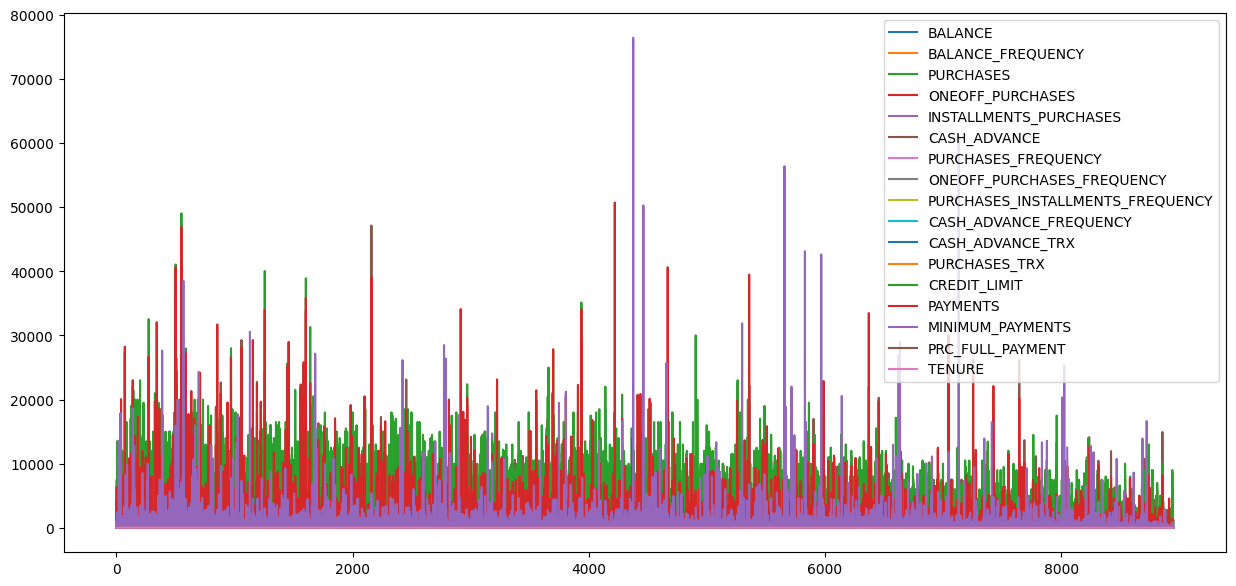

In [7]:
# 데이터 한 눈에 보기
df.plot(figsize=(15, 7))

## 데이터 전처리

In [8]:
# 1. 학습에 영향을 끼쳐서는 안되는 CUST_ID 칼럼을 drop
df.drop(['CUST_ID'], axis=1, inplace=True)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [9]:
# 2. null값 처리
# CREDIT_LIMIT 피쳐에 null값 하나, MINIMUM_PAYMENTS 피쳐에 null값 313개

# CREDIT_LIMIT 피쳐에 있는 null값 하나는 그냥 drop
df.dropna(subset=['CREDIT_LIMIT'], inplace=True)

# MINIMUM_PAYMENTS의 피쳐는 평균값으로 대체
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)

df.isnull().sum().sort_values()

BALANCE                             0
MINIMUM_PAYMENTS                    0
PAYMENTS                            0
CREDIT_LIMIT                        0
PURCHASES_TRX                       0
CASH_ADVANCE_TRX                    0
CASH_ADVANCE_FREQUENCY              0
PRC_FULL_PAYMENT                    0
PURCHASES_INSTALLMENTS_FREQUENCY    0
PURCHASES_FREQUENCY                 0
CASH_ADVANCE                        0
INSTALLMENTS_PURCHASES              0
ONEOFF_PURCHASES                    0
PURCHASES                           0
BALANCE_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY          0
TENURE                              0
dtype: int64

<Axes: >

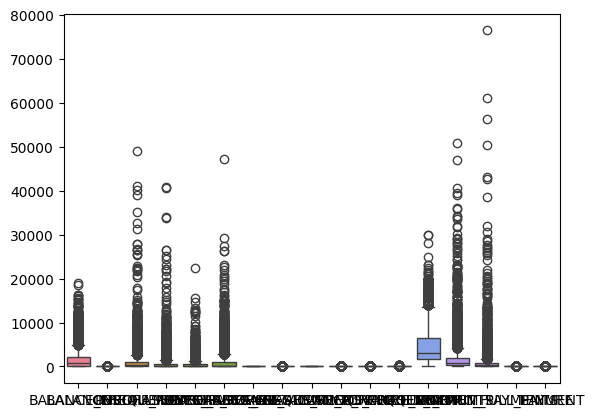

In [10]:
# 3. 이상치 처리
# 이 차트로 이상치를 확인할 수 있다.
sns.boxplot(df)

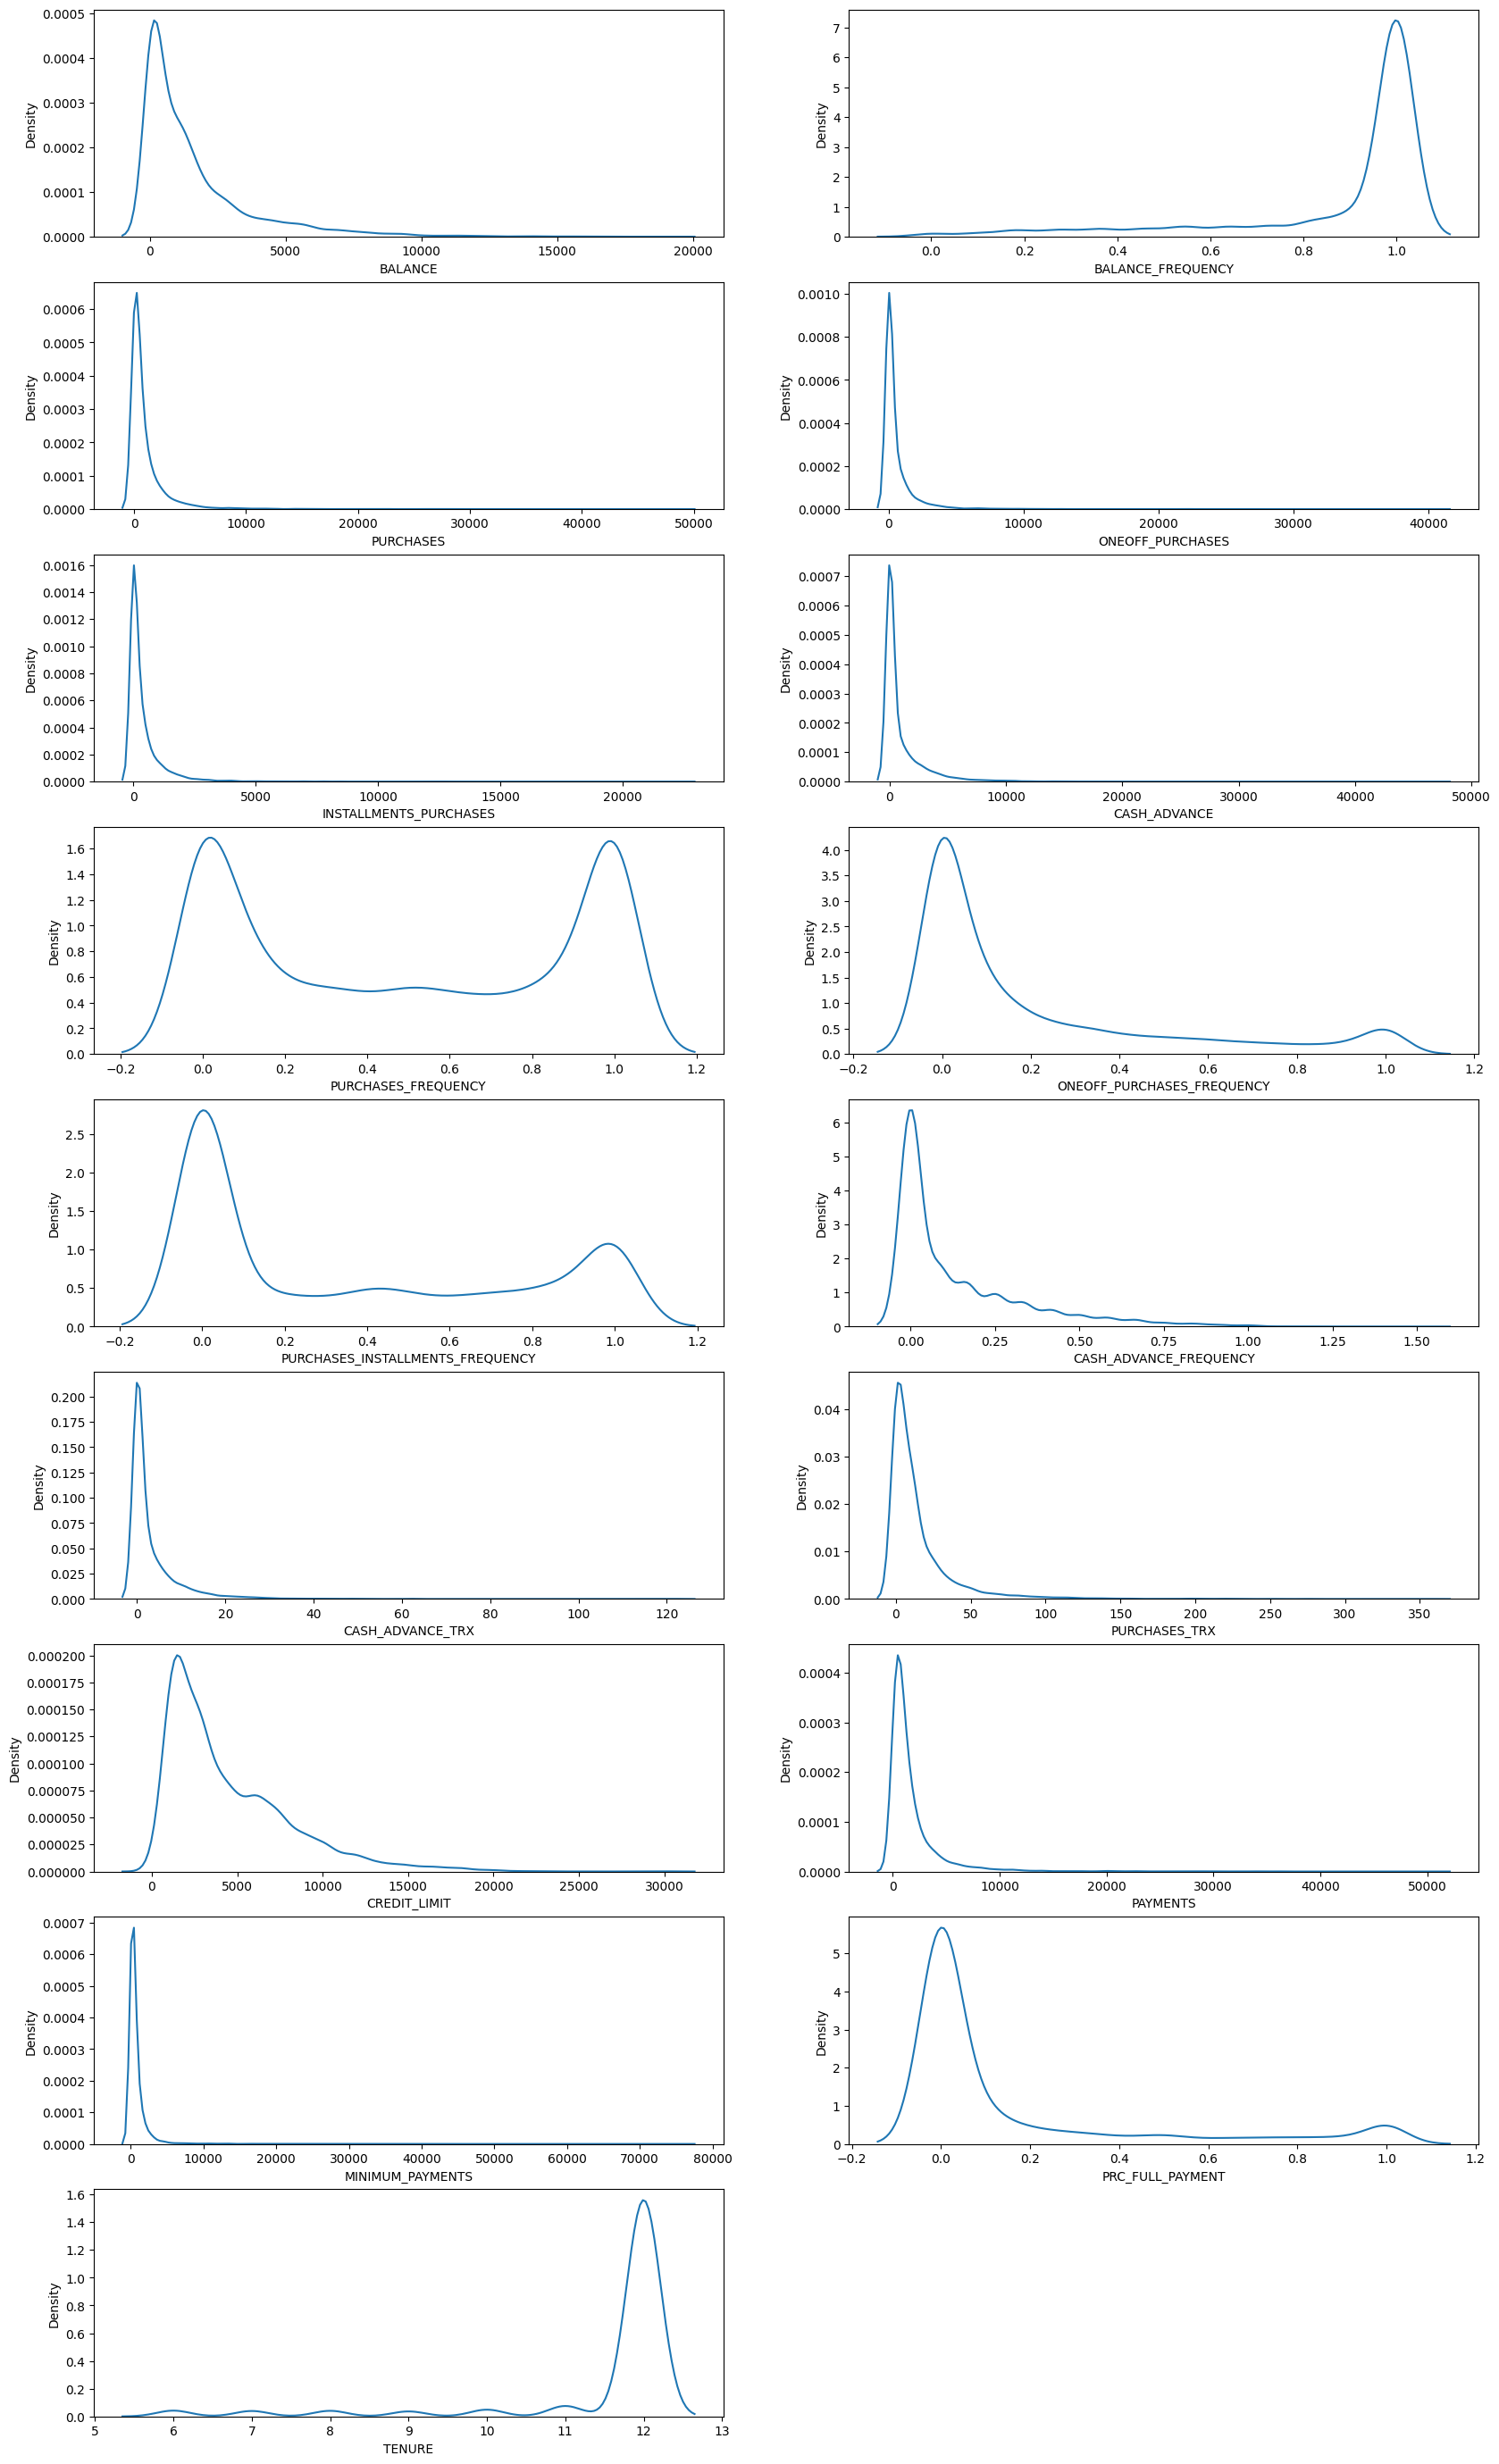

In [11]:
# 몇몇 고객들이 거래량이 많아 이상치가 많이 검출된다.
# 이상치를 처리하기엔 이런 거래량이 많은 고객들을 군집화를 못하게 된다.
# 이상치 처리 대신에 다른 방법을 찾아보자.

# kdeplot을 사용하여 확률밀도함수를 훑어보자.
# 데이터의 치우침 정도를 확인할 수 있다.

plt.figure(figsize=(20,35))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

In [12]:
# 4. 데이터 스케일링

# 데이터들이 좌측에 많이 분포되어있다.
# 로그변환을 시도해보자.
for i, col in enumerate(df.columns):
    df[col] = np.log(1 + df[col])

df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3.735304,0.597837,4.568506,0.000000,4.568506,0.000000,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,2.564949
1,8.071989,0.646627,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,8.853808,8.319725,6.978531,0.200671,2.564949
2,7.822504,0.693147,6.651791,6.651791,0.000000,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,2.564949
3,7.419183,0.492477,7.313220,7.313220,0.000000,5.331694,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,8.922792,0.000000,5.747647,0.000000,2.564949
4,6.707735,0.693147,2.833213,2.833213,0.000000,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483,0.000000,2.564949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,3.384170,0.693147,5.677165,0.000000,5.677165,0.000000,0.693147,0.000000,0.606136,0.000000,0.000000,1.945910,6.908755,5.788719,3.909748,0.405465,1.945910
8946,3.004851,0.693147,5.707110,0.000000,5.707110,0.000000,0.693147,0.000000,0.606136,0.000000,0.000000,1.945910,6.908755,5.623517,5.747647,0.000000,1.945910
8947,3.194529,0.606136,4.979489,0.000000,4.979489,0.000000,0.606136,0.000000,0.510826,0.000000,0.000000,1.791759,6.908755,4.410016,4.423869,0.223144,1.945910
8948,2.671218,0.606136,0.000000,0.000000,0.000000,3.625907,0.000000,0.000000,0.000000,0.154151,1.098612,0.000000,6.216606,3.980615,4.038755,0.223144,1.945910


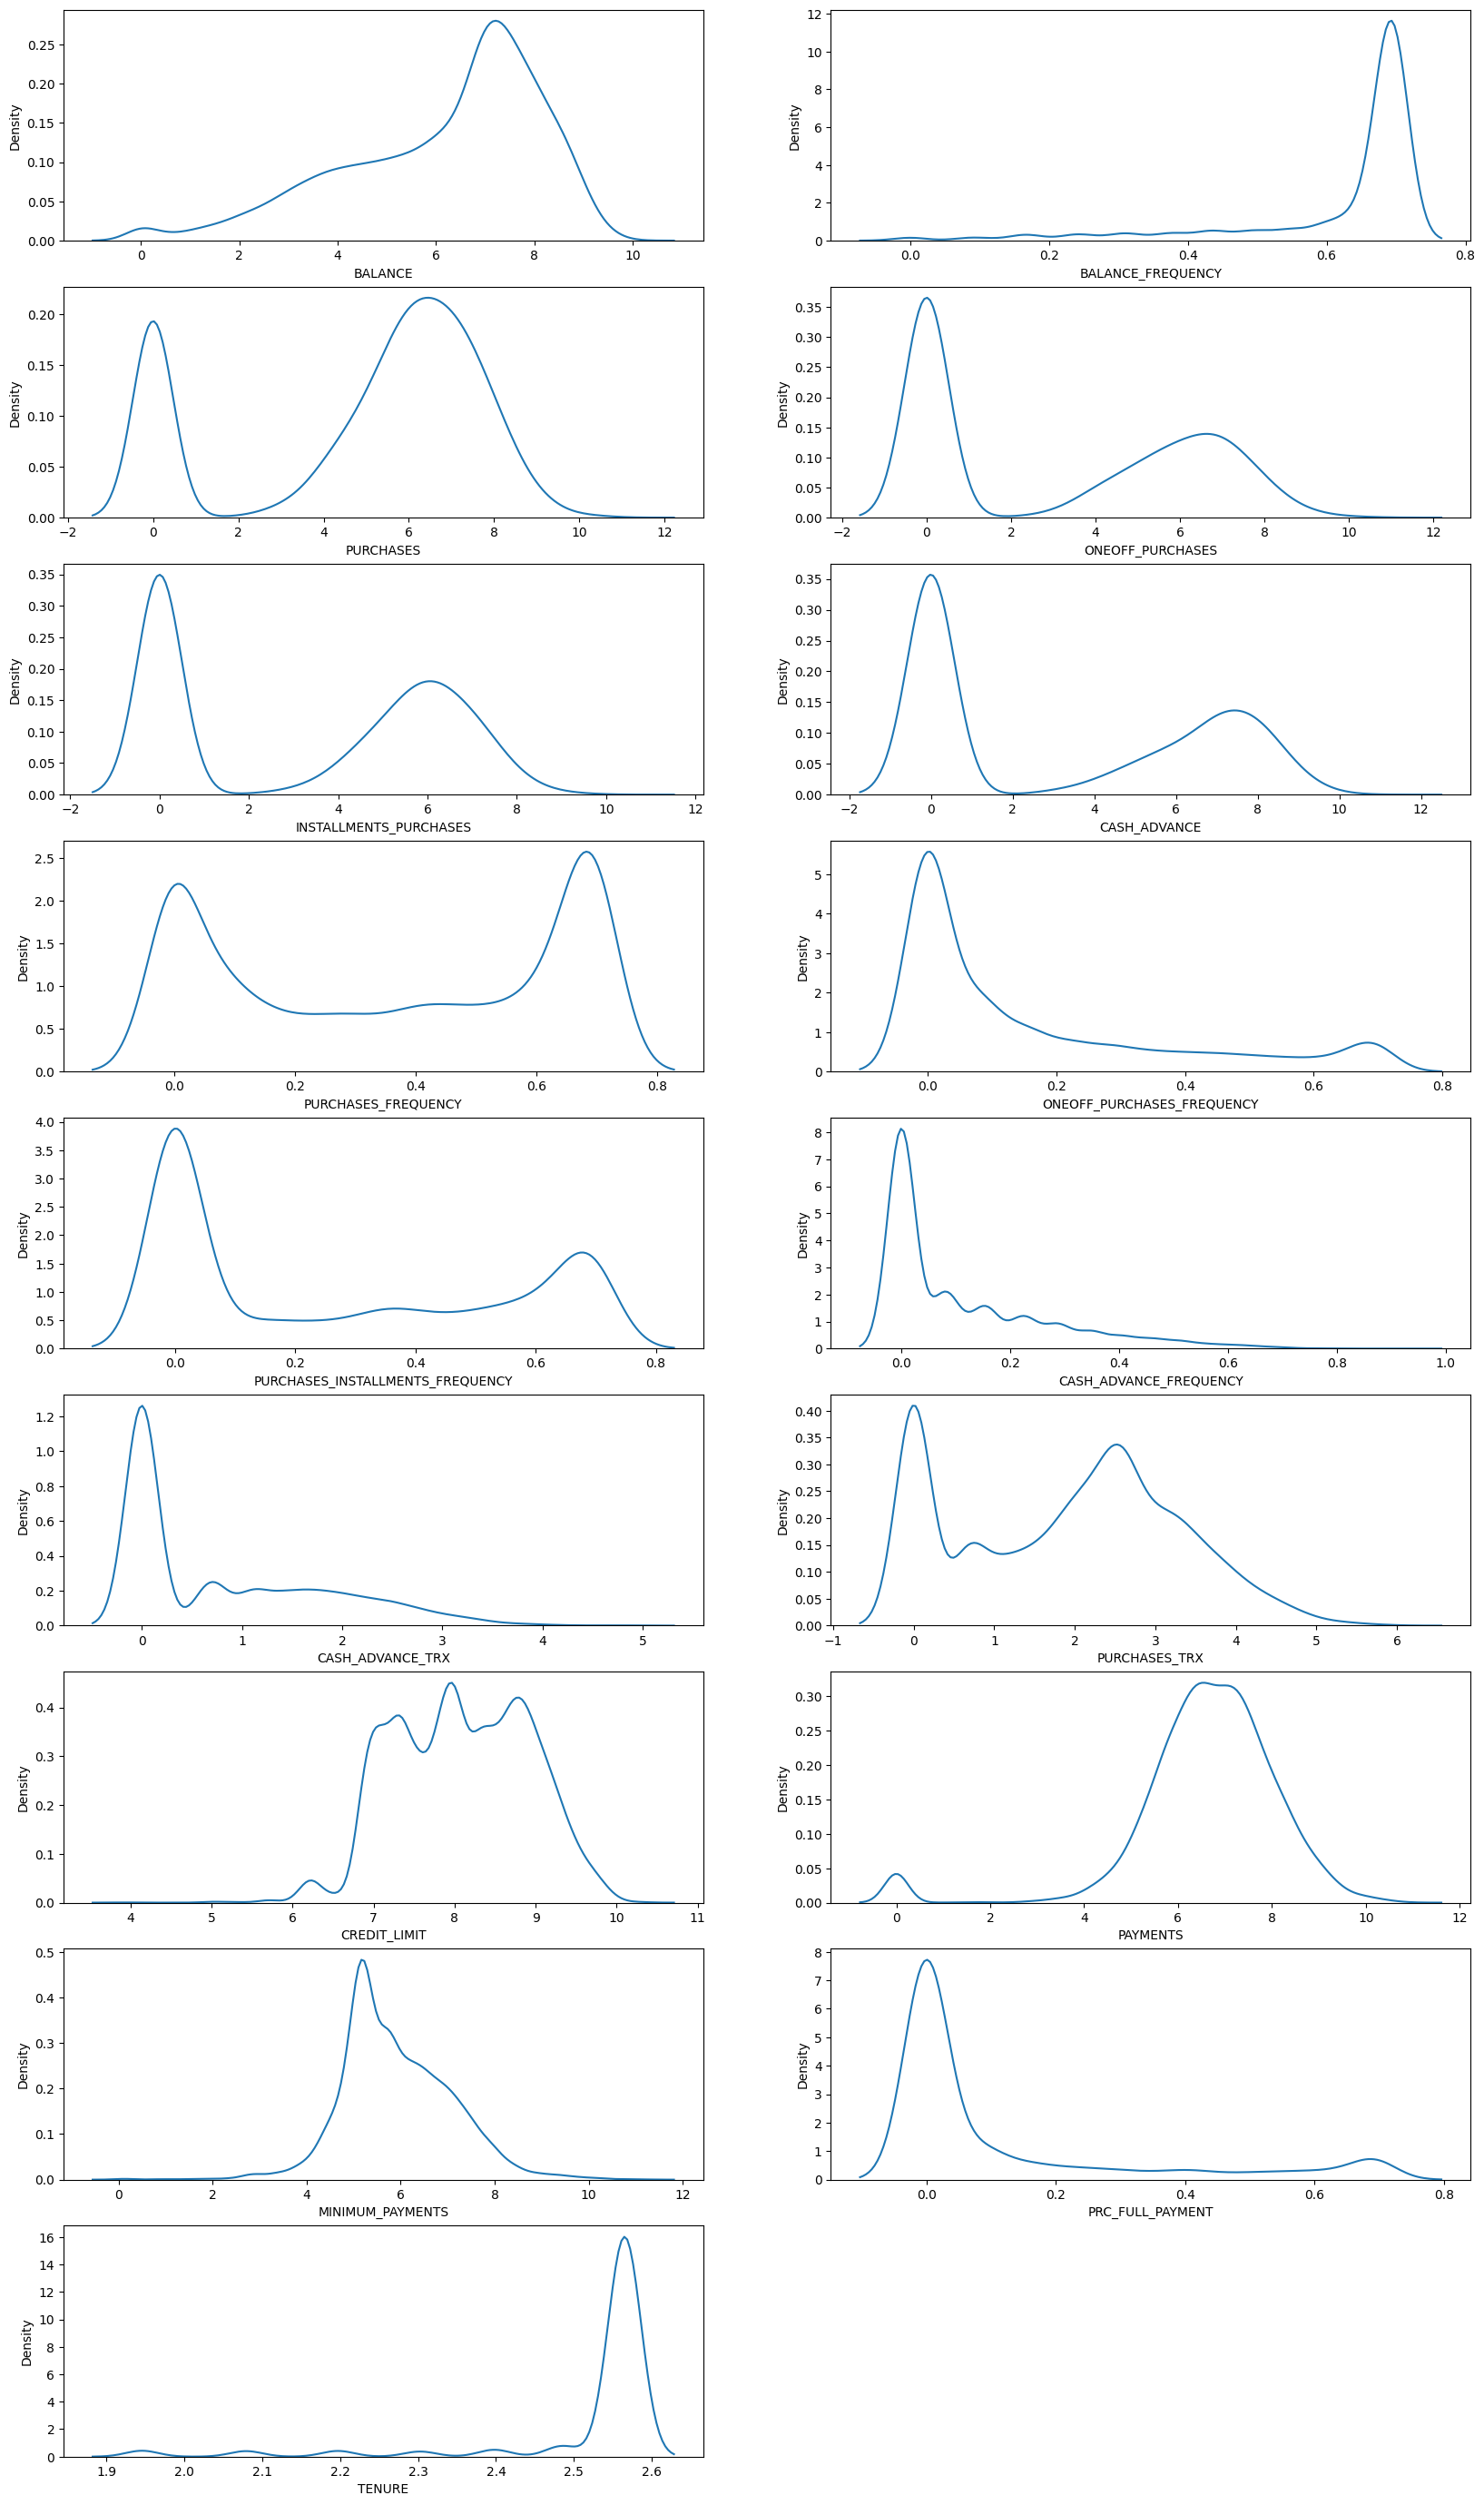

In [13]:
plt.figure(figsize=(20,35))
for i, col in enumerate(df.columns):
    ax = plt.subplot(9, 2, i+1)
    sns.kdeplot(df[col], ax=ax)
    plt.xlabel(col)

plt.show()
# 이상적이진 않지만 그래도 하기 전보단 분포가 훨씬 완만해지고 나아졌다.

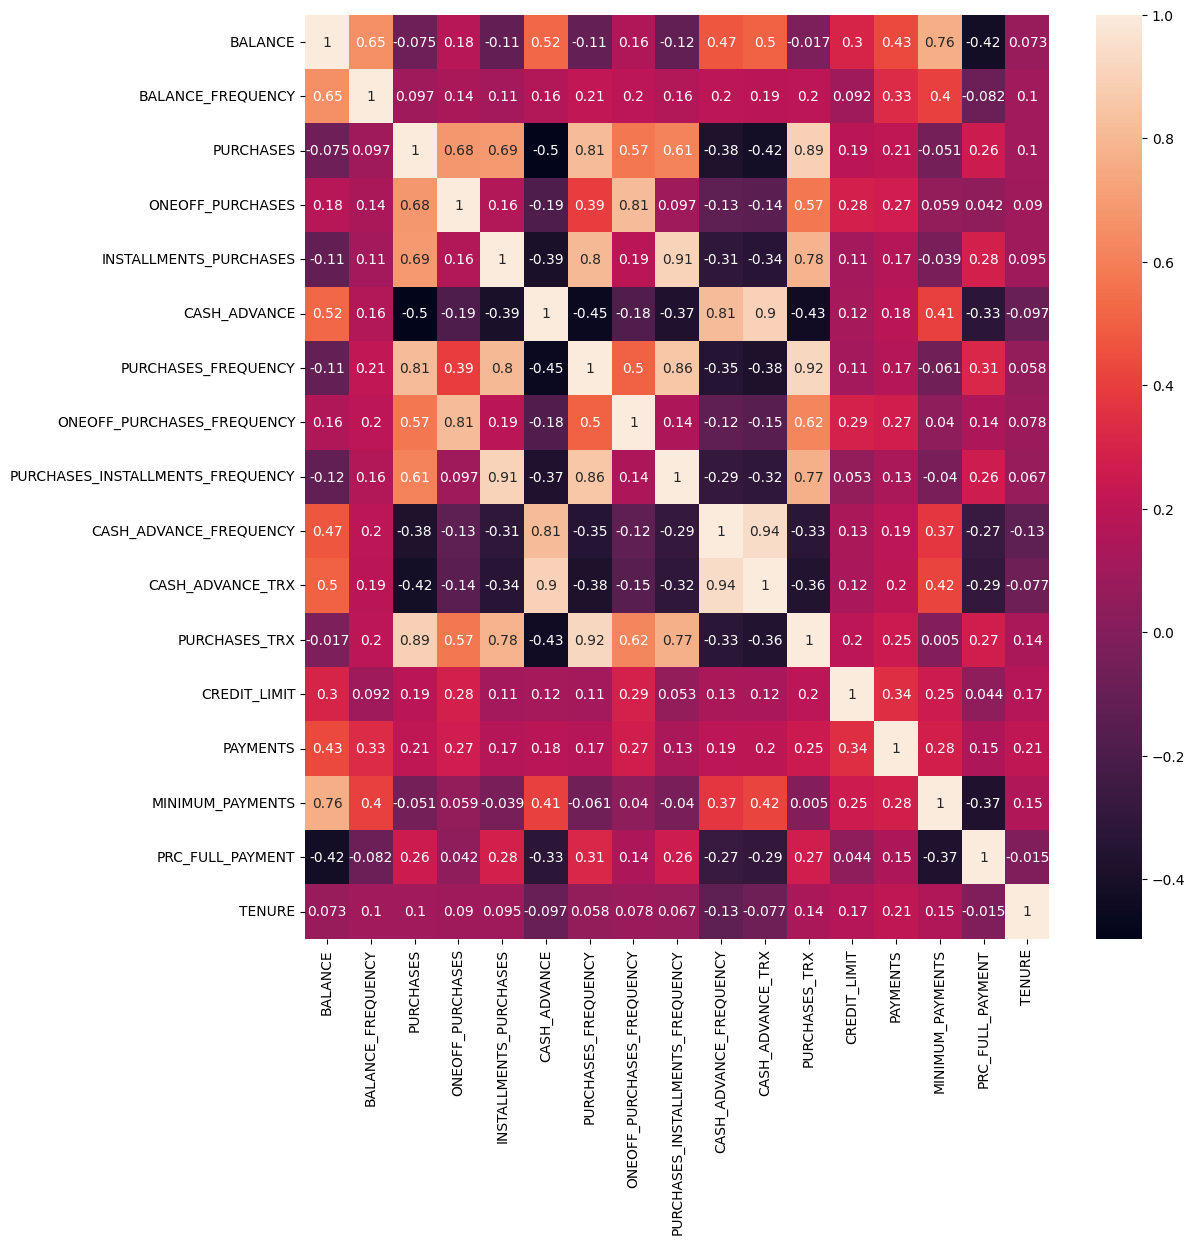

In [14]:
# 상관관계 분석 시각화
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [15]:
# 5. 차원 축소
# 2차원으로 축소
pca = PCA(n_components=2, random_state=123)
X = pca.fit_transform(df)
X_df = pd.DataFrame(X, columns=['component1', 'component2'])
X_df

,component1,component2
0,1.011206,-5.610142
1,-8.970289,1.535332
2,2.617544,1.328074
3,-0.308698,2.979302
4,-1.233562,-2.718457
...,...,...
8944,2.440316,-5.511137
8945,2.407432,-5.369235
8946,1.662009,-5.979337
8947,-5.675269,-5.424253


# 군집화

# K-Means

In [16]:
# K-Means 모델 리스트 생성
kmeans_models = [KMeans(n_clusters=k, random_state=123).fit(X_df.iloc[:, :2]) for k in range(1, 10)]

# 관성 계산
# 관성 = 군집 내 데이터 포인트들이 군집의 중심에서 얼마나 멀리 떨어져 있는지를 측정하는 지표
#        값이 작을수록 데이터 포인트가 중심에 가깝게 군집화되어 있음을 의미합니다.
inertia = [model.inertia_ for model in kmeans_models]

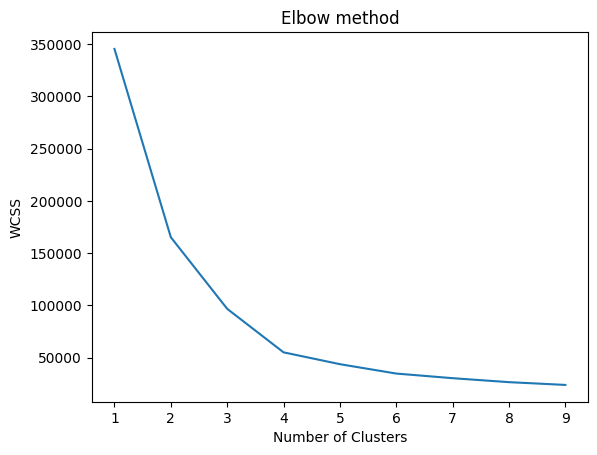

In [17]:
# Elbow 기법 시각화
# -> 최적의 군집 수를 선택하는 데 도움을 줌.
#    Elbow 지점은 관성 값이 급격히 감소하는 지점으로, 이 지점을 최적의 군집 수로 간주.
plt.plot(range(1, 10), inertia)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()
# Elbow는 3, 4 정도 되는 것 같다.

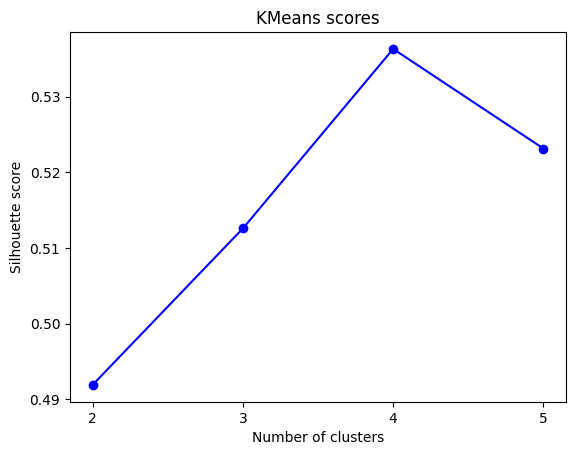

In [18]:
# Silhouette score로 군집 평가
# Silhouette score는 -1 ~ 1 사이의 값을 가지며, 1에 가까울수록 좋은 군집화를 의미
kmeans_scores = [silhouette_score(X_df.iloc[:, :2], model.labels_) for model in kmeans_models[1:5]]
plt.plot(range(2,6), kmeans_scores, "bo-")
plt.xticks([2, 3, 4, 5])
plt.title('KMeans scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()
# 군집이 4개일 때 가장 점수가 높다.

In [19]:
# 4개로 군집화
kmeans = KMeans(n_clusters=4, random_state=123)
y_kmeans = kmeans.fit(X_df.iloc[:, :2])

kmeans_score = silhouette_score(X_df.iloc[:, :2], kmeans.labels_)
kmeans_score

0.5362924291400428

In [20]:
# X_df 데이터프레임에 KMeans로 나눈 군집 피쳐 생성
X_df['kmeans_cluster'] = kmeans.labels_
X_df

,component1,component2,kmeans_cluster
0,1.011206,-5.610142,0
1,-8.970289,1.535332,2
2,2.617544,1.328074,3
3,-0.308698,2.979302,1
4,-1.233562,-2.718457,0
...,...,...,...
8944,2.440316,-5.511137,0
8945,2.407432,-5.369235,0
8946,1.662009,-5.979337,0
8947,-5.675269,-5.424253,2


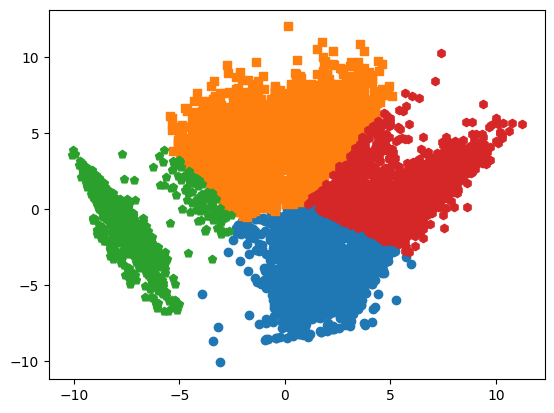

In [21]:
# KMeans 차트
cluster0 = X_df[X_df['kmeans_cluster'] == 0].index
cluster1 = X_df[X_df['kmeans_cluster'] == 1].index
cluster2 = X_df[X_df['kmeans_cluster'] == 2].index
cluster3 = X_df[X_df['kmeans_cluster'] == 3].index

plt.scatter(x = X_df.loc[cluster0, 'component1'],
            y = X_df.loc[cluster0, 'component2'], marker = 'o')
plt.scatter(x = X_df.loc[cluster1, 'component1'],
            y = X_df.loc[cluster1, 'component2'], marker = 's')
plt.scatter(x = X_df.loc[cluster2, 'component1'],
            y = X_df.loc[cluster2, 'component2'], marker = 'p')
plt.scatter(x = X_df.loc[cluster3, 'component1'],
            y = X_df.loc[cluster3, 'component2'], marker = 'h')

plt.show()

# Mean Shift - KDE

In [22]:
# 최적의 bandwidth 구하기
bw = estimate_bandwidth(X_df.iloc[:, :2])
meanshift = MeanShift(bandwidth=bw)
y_meanshift = meanshift.fit_predict(X_df.iloc[:, :2])

meanshift_score = silhouette_score(X_df.iloc[:, :2], y_meanshift)

print(meanshift_score)
# 군집 종류의 고유값을 출력해 몇개의 군집으로 나뉘었는지 확인
print(np.unique(y_meanshift))

0.4923247144740476
[0 1]


In [23]:
# X_df 데이터프레임에 MeanShift로 나눈 군집 피쳐 생성
X_df['meanshift_cluster'] = meanshift.labels_
X_df

,component1,component2,kmeans_cluster,meanshift_cluster
0,1.011206,-5.610142,0,0
1,-8.970289,1.535332,2,1
2,2.617544,1.328074,3,0
3,-0.308698,2.979302,1,0
4,-1.233562,-2.718457,0,0
...,...,...,...,...
8944,2.440316,-5.511137,0,0
8945,2.407432,-5.369235,0,0
8946,1.662009,-5.979337,0,0
8947,-5.675269,-5.424253,2,1


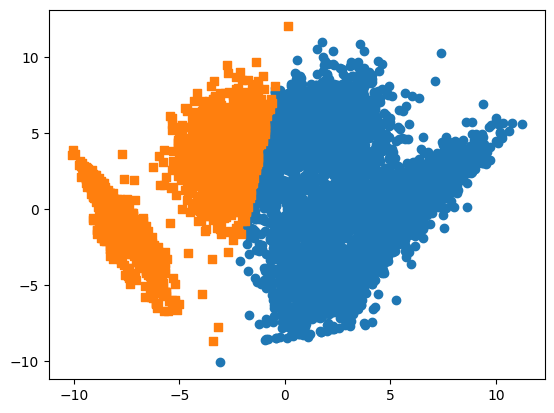

In [24]:
# MeanShift 차트
cluster0 = X_df[X_df['meanshift_cluster'] == 0].index
cluster1 = X_df[X_df['meanshift_cluster'] == 1].index

plt.scatter(x = X_df.loc[cluster0, 'component1'],
            y = X_df.loc[cluster0, 'component2'], marker = 'o')
plt.scatter(x = X_df.loc[cluster1, 'component1'],
            y = X_df.loc[cluster1, 'component2'], marker = 's')

plt.show()

# Gaussian Mixture Model

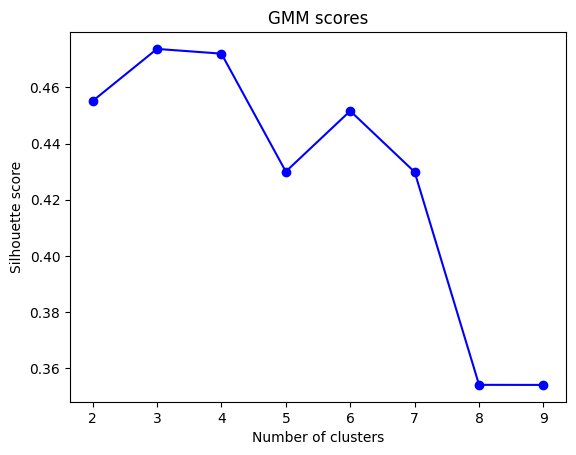

In [25]:
# GMM 모델 리스트 생성
gmm_models = [GaussianMixture(n_components=k, random_state=123).fit_predict(X_df.iloc[:, :2]) for k in range(1, 10)]

# Silhouette score로 군집 평가
# Silhouette score는 -1 ~ 1 사이의 값을 가지며, 1에 가까울수록 좋은 군집화를 의미
gmm_scores = [silhouette_score(X_df.iloc[:, :2], label) for label in gmm_models[1:9]]

plt.plot(range(2,10), gmm_scores, "bo-")
plt.xticks([2, 3, 4, 5, 6, 7, 8, 9])
plt.title('GMM scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()
# 군집이 4개일 때 가장 점수가 높다.

In [26]:
# 4개로 군집화
gmm = GaussianMixture(n_components=4, random_state=123)
y_gmm = gmm.fit_predict(X_df.iloc[:, :2])

gmm_score = silhouette_score(X_df.iloc[:, :2], y_gmm)
gmm_score

0.47202963814424315

In [27]:
# X_df 데이터프레임에 GMM으로 나눈 군집 피쳐 생성
X_df['gmm_cluster'] = y_gmm
X_df

,component1,component2,kmeans_cluster,meanshift_cluster,gmm_cluster
0,1.011206,-5.610142,0,0,0
1,-8.970289,1.535332,2,1,2
2,2.617544,1.328074,3,0,3
3,-0.308698,2.979302,1,0,1
4,-1.233562,-2.718457,0,0,3
...,...,...,...,...,...
8944,2.440316,-5.511137,0,0,0
8945,2.407432,-5.369235,0,0,0
8946,1.662009,-5.979337,0,0,0
8947,-5.675269,-5.424253,2,1,2


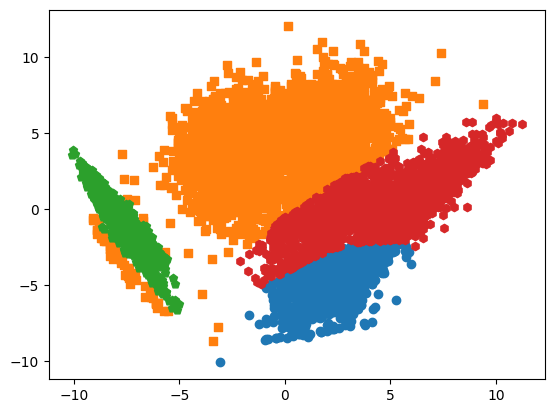

In [28]:
# GMM 차트
cluster0 = X_df[X_df['gmm_cluster'] == 0].index
cluster1 = X_df[X_df['gmm_cluster'] == 1].index
cluster2 = X_df[X_df['gmm_cluster'] == 2].index
cluster3 = X_df[X_df['gmm_cluster'] == 3].index

plt.scatter(x = X_df.loc[cluster0, 'component1'],
            y = X_df.loc[cluster0, 'component2'], marker = 'o')
plt.scatter(x = X_df.loc[cluster1, 'component1'],
            y = X_df.loc[cluster1, 'component2'], marker = 's')
plt.scatter(x = X_df.loc[cluster2, 'component1'],
            y = X_df.loc[cluster2, 'component2'], marker = 'p')
plt.scatter(x = X_df.loc[cluster3, 'component1'],
            y = X_df.loc[cluster3, 'component2'], marker = 'h')

plt.show()

# DBSCAN

In [29]:
dbscan = DBSCAN(eps=1, min_samples=8)
y_dbscan = dbscan.fit_predict(X_df.iloc[:, :2])

dbscan_score = silhouette_score(X_df.iloc[:, :2], y_dbscan)

print(dbscan_score)
print(np.unique(y_dbscan))

0.4557208374970259
[-1  0  1]


In [30]:
# 최적의 파라미터 설정

# 하이퍼 파라미터 범위 설정
eps_params = np.arange(0.1, 1.5, 0.1)
min_samples_params = range(3, 11)

# best 파라미터 변수
best_eps = 0
best_min_samples = 0
best_dbscan_score = -1

# 최적의 파라미터 구하는 함수
for eps in eps_params:
    for min_samples in min_samples_params:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_models = dbscan.fit_predict(X_df.iloc[:, :2])

        # 노이즈 포인트 제외하고 실루엣 점수 계산
        if len(np.unique(dbscan_models)) > 1:
            score = silhouette_score(X_df.iloc[:, :2], dbscan_models)

            # best 점수 업데이트
            if score > best_dbscan_score:
                best_eps = eps
                best_min_samples = min_samples
                best_dbscan_score = score

print(f"Best eps: {best_eps}")
print(f"Best min_samples: {best_min_samples}")
print(f"Best silhouette score: {best_dbscan_score}")

Best eps: 1.3000000000000003
Best min_samples: 9
Best silhouette score: 0.47462807593048795


In [31]:
# 최적의 파라미터 적용
dbscan = DBSCAN(eps=1.3, min_samples=9)
y_dbscan = dbscan.fit_predict(X_df.iloc[:, :2])

dbscan_score = silhouette_score(X_df.iloc[:, :2], y_dbscan)

print(dbscan_score)
print(np.unique(y_dbscan))

0.47462807593048795
[-1  0  1]


In [32]:
# X_df 데이터프레임에 DBSCAN으로 나눈 군집 피쳐 생성
X_df['dbscan_cluster'] = y_dbscan
X_df

,component1,component2,kmeans_cluster,meanshift_cluster,gmm_cluster,dbscan_cluster
0,1.011206,-5.610142,0,0,0,0
1,-8.970289,1.535332,2,1,2,1
2,2.617544,1.328074,3,0,3,0
3,-0.308698,2.979302,1,0,1,0
4,-1.233562,-2.718457,0,0,3,0
...,...,...,...,...,...,...
8944,2.440316,-5.511137,0,0,0,0
8945,2.407432,-5.369235,0,0,0,0
8946,1.662009,-5.979337,0,0,0,0
8947,-5.675269,-5.424253,2,1,2,1


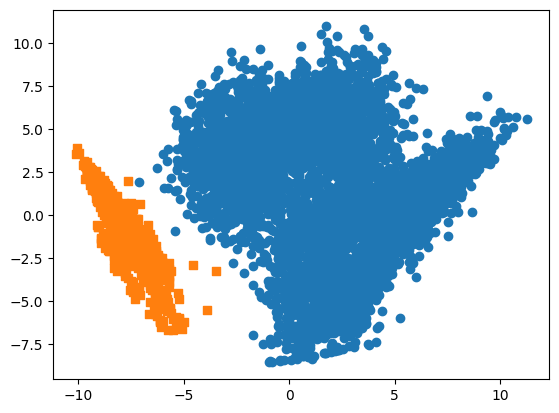

In [33]:
# DBSCAN 차트
cluster0 = X_df[X_df['dbscan_cluster'] == 0].index
cluster1 = X_df[X_df['dbscan_cluster'] == 1].index

plt.scatter(x = X_df.loc[cluster0, 'component1'],
            y = X_df.loc[cluster0, 'component2'], marker = 'o')
plt.scatter(x = X_df.loc[cluster1, 'component1'],
            y = X_df.loc[cluster1, 'component2'], marker = 's')

plt.show()

# 군집화 정확도 비교

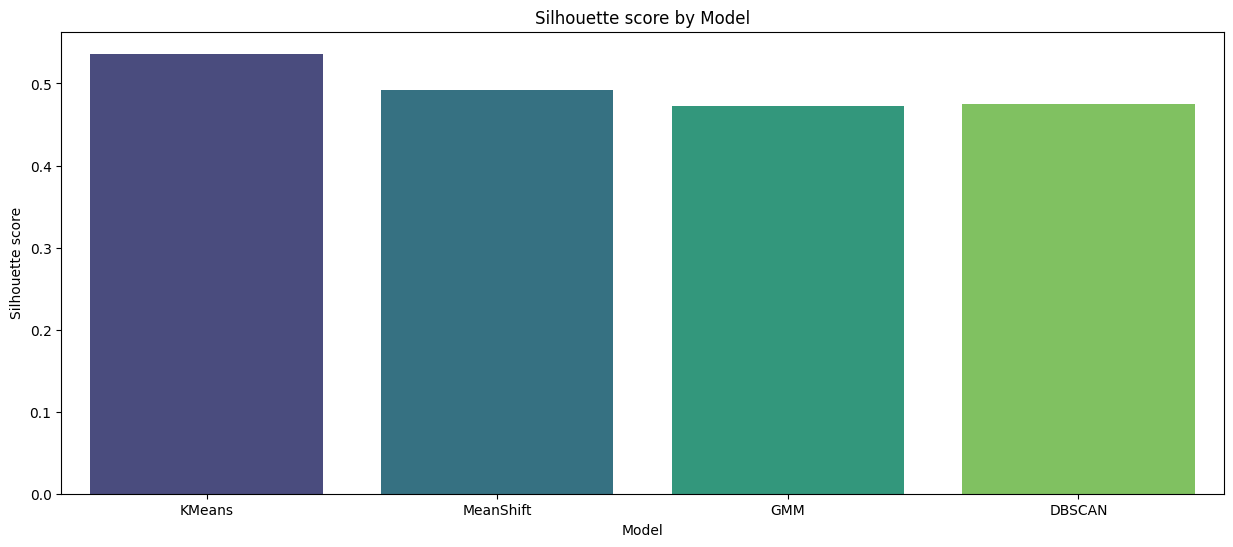

,model,silhouette_score
0,KMeans,0.536292
1,MeanShift,0.492325
2,GMM,0.472030
3,DBSCAN,0.474628


In [34]:
score = {'model':['KMeans', 'MeanShift', 'GMM', 'DBSCAN'],
         'silhouette_score': [kmeans_score, meanshift_score, gmm_score, dbscan_score]}

df_score = pd.DataFrame(score)

# 차트 설정
plt.figure(figsize=(15, 6))
sns.barplot(x='model', y='silhouette_score', data=df_score, palette='viridis')
plt.title('Silhouette score by Model')
plt.xlabel('Model')
plt.ylabel('Silhouette score')

plt.show()
df_score